# Super-Store Sales Prediction
## Problem Statement:
For these kinds of challenges, regression is a useful machine learning model. Predicting sales of a firm requires time series
data from that company, and the model can predict future sales of that company or product based on that data. As a result,
in this research project, we will evaluate a company's time-series sales data and forecast the company's sales for the future
quarter and for a specific product.

In [1]:
#Importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from xgboost import XGBRegressor


# Project Goals:
• Analyze the daily sales data and understand the influence of external factors

• Performed data analysis to identify outliers, missing values, and attribute selection

• Built predictive models using sales data and influential external factors

• R-square and Root Mean Square Error (RMSE) were used to evaluate the performance in comparison to baseline models


• For this type of sales forecasting project, we'll use linear regression and extreme gradient boosting regression and evaluate the results using data from the training and testing sets.

In [2]:
#Importing dataset
df = pd.read_csv("superstore_dataset2011-2015.csv")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Dra�,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Ju�rez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [3]:
#Checking the variables
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [4]:
#Checking the data frame’s description.
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [5]:
#Checking for null/missing values
df.isnull().sum().sort_values(ascending=False)

Postal Code       41296
Row ID                0
Region                0
Shipping Cost         0
Profit                0
Discount              0
Quantity              0
Sales                 0
Product Name          0
Sub-Category          0
Category              0
Product ID            0
Market                0
Order ID              0
Country               0
State                 0
City                  0
Segment               0
Customer Name         0
Customer ID           0
Ship Mode             0
Ship Date             0
Order Date            0
Order Priority        0
dtype: int64

In [6]:
#As date have 2 different format so making it one 
df['Order Date'] = df['Order Date'].str.replace('-', '/')
df['Ship Date'] = df['Ship Date'].str.replace('-', '/')

df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31/12/2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31/12/2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Dra�,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31/12/2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31/12/2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Ju�rez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [7]:
#Extracting Date, Month and Year separately from Order Date and Ship Date feature

df['Order_Date'] = df['Order Date'].str.split('/').str[0]
df['Order_Month'] = df['Order Date'].str.split('/').str[1]
df['Order_Year'] = df['Order Date'].str.split('/').str[2]

df['Ship_Date'] = df['Ship Date'].str.split('/').str[0]
df['Ship_Month'] = df['Ship Date'].str.split('/').str[1]
df['Ship_Year'] = df['Ship Date'].str.split('/').str[2]

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Discount,Profit,Shipping Cost,Order Priority,Order_Date,Order_Month,Order_Year,Ship_Date,Ship_Month,Ship_Year
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,0.0,106.140,35.46,Medium,1,1,2011,6,1,2011
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,0.1,36.036,9.72,Medium,1,1,2011,8,1,2011
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,0.0,29.640,8.17,High,1,1,2011,5,1,2011
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,0.5,-26.055,4.82,High,1,1,2011,5,1,2011
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,0.1,37.770,4.70,Medium,1,1,2011,8,1,2011


In [8]:
#Dropping as already created new features
df.drop('Order Date', axis=1,inplace=True)
df.drop('Ship Date', axis=1,inplace=True)
df.head()

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,...,Discount,Profit,Shipping Cost,Order Priority,Order_Date,Order_Month,Order_Year,Ship_Date,Ship_Month,Ship_Year
0,42433,AG-2011-2040,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,...,0.0,106.140,35.46,Medium,1,1,2011,6,1,2011
1,22253,IN-2011-47883,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,...,0.1,36.036,9.72,Medium,1,1,2011,8,1,2011
2,48883,HU-2011-1220,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,...,0.0,29.640,8.17,High,1,1,2011,5,1,2011
3,11731,IT-2011-3647632,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,...,0.5,-26.055,4.82,High,1,1,2011,5,1,2011
4,22255,IN-2011-47883,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,...,0.1,37.770,4.70,Medium,1,1,2011,8,1,2011


In [9]:
df.info()  # Showing information about datase

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Ship Mode       51290 non-null  object 
 3   Customer ID     51290 non-null  object 
 4   Customer Name   51290 non-null  object 
 5   Segment         51290 non-null  object 
 6   City            51290 non-null  object 
 7   State           51290 non-null  object 
 8   Country         51290 non-null  object 
 9   Postal Code     9994 non-null   float64
 10  Market          51290 non-null  object 
 11  Region          51290 non-null  object 
 12  Product ID      51290 non-null  object 
 13  Category        51290 non-null  object 
 14  Sub-Category    51290 non-null  object 
 15  Product Name    51290 non-null  object 
 16  Sales           51290 non-null  float64
 17  Quantity        51290 non-null 

In [10]:
#Converting data types of the variables

df[['Order_Date','Order_Month','Order_Year','Ship_Date','Ship_Month','Ship_Year']] = df[['Order_Date','Order_Month','Order_Year','Ship_Date','Ship_Month','Ship_Year']].astype(int) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Ship Mode       51290 non-null  object 
 3   Customer ID     51290 non-null  object 
 4   Customer Name   51290 non-null  object 
 5   Segment         51290 non-null  object 
 6   City            51290 non-null  object 
 7   State           51290 non-null  object 
 8   Country         51290 non-null  object 
 9   Postal Code     9994 non-null   float64
 10  Market          51290 non-null  object 
 11  Region          51290 non-null  object 
 12  Product ID      51290 non-null  object 
 13  Category        51290 non-null  object 
 14  Sub-Category    51290 non-null  object 
 15  Product Name    51290 non-null  object 
 16  Sales           51290 non-null  float64
 17  Quantity        51290 non-null 

<AxesSubplot:>

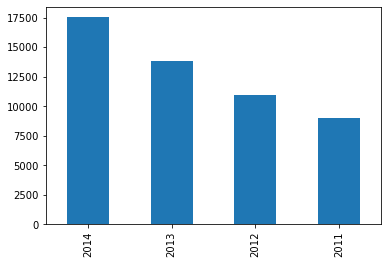

In [11]:
df['Order_Year'].value_counts().sort_index(ascending=False).plot(kind='bar')

Text(0, 0.5, 'Sales Amount')

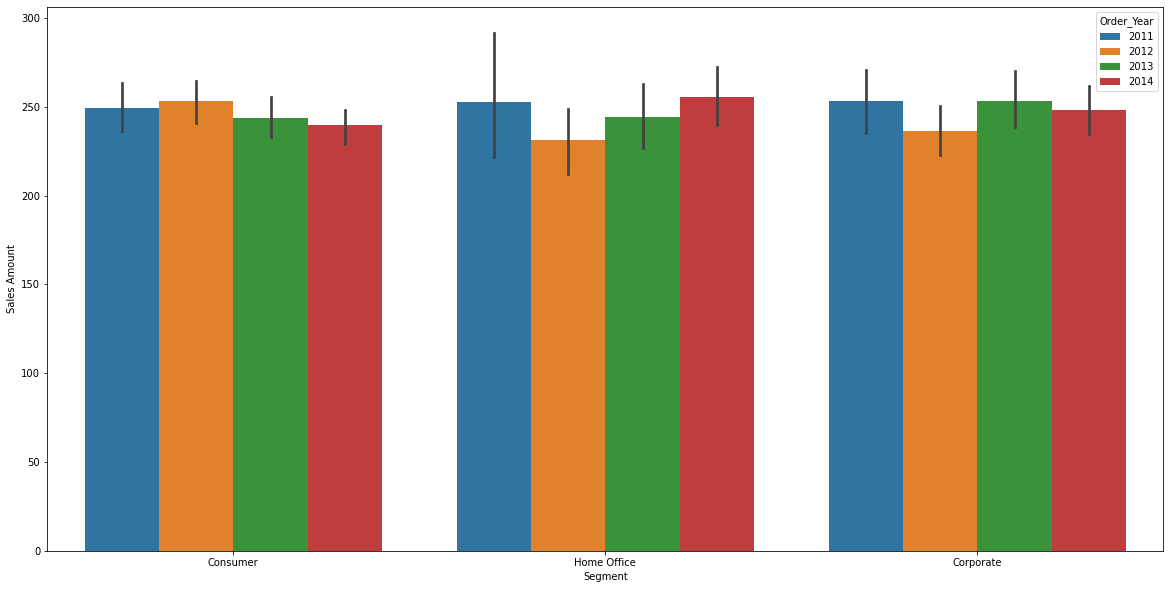

In [12]:
plt.figure(figsize = (20,10))

a = sns.barplot(x = df.Segment, y = df.Sales, hue = df.Order_Year)
a.set_ylabel('Sales Amount')

Here, we observed different segments of sales data for different order years. We found that only for the consumer segment, 2012 year was having highest sales. However, for the home office segment and corporate, we have the lowest sales in 2012 years. Similarly, the years 2011 and 2013 have approximately the same sales for consumer and corporate segments, whereas the home office segment has similar sales for the 2011 and 2014 years.

<AxesSubplot:>

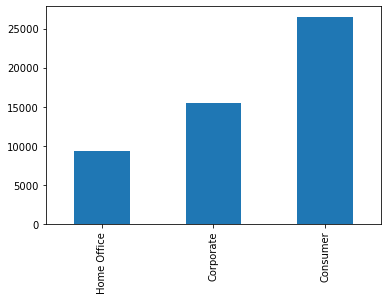

In [13]:
df['Segment'].value_counts().sort_index(ascending=False).plot(kind='bar')
#The value_counts() function is used to get a Series containing counts of unique values.

<AxesSubplot:>

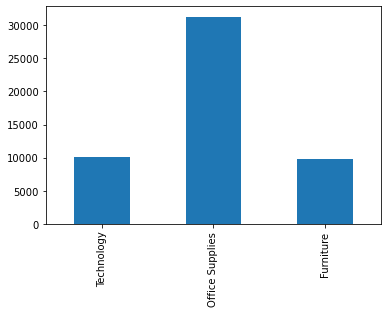

In [14]:
df['Category'].value_counts().sort_index(ascending=False).plot(kind='bar')

<AxesSubplot:>

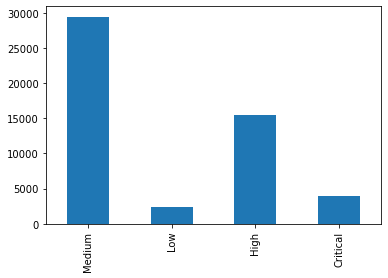

In [15]:
df['Order Priority'].value_counts().sort_index(ascending=False).plot(kind='bar')

In [16]:
df['Category'].value_counts()

Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64

In [17]:
df['Segment'].value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

In [18]:
df['Order Priority'].value_counts()

Medium      29433
High        15501
Critical     3932
Low          2424
Name: Order Priority, dtype: int64

In [19]:
df['Product Name'].value_counts()

Staples                                                227
Cardinal Index Tab, Clear                               92
Eldon File Cart, Single Width                           90
Rogers File Cart, Single Width                          84
Ibico Index Tab, Clear                                  83
                                                      ... 
Eldon File Chest Portable File                           1
Avaya IP Phone 1140E VoIP phone                          1
Fellowes Smart Surge Ten-Outlet Protector, Platinum      1
Xerox 1938                                               1
Chromcraft Training Table, Adjustable Height             1
Name: Product Name, Length: 3788, dtype: int64

In [20]:
df['Ship Mode'].value_counts()

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Order Priority', ylabel='Count'>

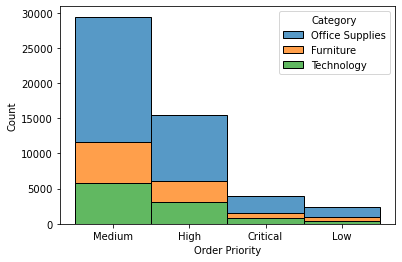

In [21]:
sns.histplot(x = 'Order Priority', hue = 'Category', data = df, multiple="stack")

<AxesSubplot:xlabel='Order_Date', ylabel='Count'>

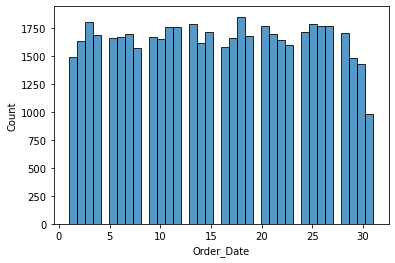

In [22]:
sns.histplot(data = df, x = df.Order_Date)

In [23]:
df['Market'].value_counts()

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

In [24]:
df['Region'].value_counts()

Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64

In [25]:
df['Sub-Category'].value_counts()

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: Sub-Category, dtype: int64

In [26]:
df['Postal Code'].value_counts()

10035.0    263
10024.0    230
10009.0    229
94122.0    203
10011.0    193
          ... 
33063.0      1
96003.0      1
94061.0      1
50701.0      1
80122.0      1
Name: Postal Code, Length: 631, dtype: int64

In [27]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
df['Sub-Category']= label_encoder.fit_transform(df['Sub-Category'])
df['Region']= label_encoder.fit_transform(df['Region'])
df['Country']= label_encoder.fit_transform(df['Country'])
df['City']= label_encoder.fit_transform(df['City'])
df['State']= label_encoder.fit_transform(df['State'])
df['Product Name']= label_encoder.fit_transform(df['Product Name'])
df['Product ID']= label_encoder.fit_transform(df['Product ID'])
df['Postal Code']= label_encoder.fit_transform(df['Postal Code'])
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Segment'] = label_encoder.fit_transform(df['Segment'])
df['Order Priority'] = label_encoder.fit_transform(df['Order Priority'])
df['Ship Mode'] = label_encoder.fit_transform(df['Ship Mode'])
df['Market'] = label_encoder.fit_transform(df['Market'])
df['Sub-Category'].unique()

array([14, 15, 12,  9,  6,  4,  1,  2,  0,  3, 10,  7,  5, 11, 16, 13,  8])

In [28]:
df['Region'].unique()

array([ 0,  9,  5,  7,  4, 12,  8,  3, 10,  1, 11,  6,  2])

In [29]:
df['City'].unique()

array([ 785, 3453,  515, ..., 2135, 1778,  884])

In [30]:
df['State'].unique()

array([255, 702, 175, ..., 639, 468, 440])

In [31]:
df['Country'].unique()

array([  2,   6,  56, 123,  10, 139,   3,  26,  97,  59,  44,  63,  47,
        22, 138, 136,  65,  58,  94, 117, 100, 101,  27,  61,  92,  81,
        17, 133, 119, 102,  57, 115,  38, 121, 113,  37, 109,  32,  95,
        91,  68,  30, 142, 112,  54, 128,  35,  85,   1,  13,   0,  15,
       143,  50,  52, 129,  60,  87,  36,  90,  48,  28,   7,   4,  76,
       107, 116,  16,  77, 106,  62,  19,  21,  99, 110,  46,  67, 137,
        96,  72,  31,  64,  14, 126, 108, 124,  33,  53, 104,  25,  18,
        86,  70,  11, 141,  82,  20,  51,   8, 145, 140, 103, 135,  79,
       130, 146,  43,  12,  73,  74, 105, 132,  98, 134, 144, 131,  69,
        29,  89,  78,  88, 125, 111,  45,  80,  49,  93, 120,  34,  66,
        39,  55,  83,  40, 114,  42, 127,  84,  23,  71,  24,   5, 122,
        41, 118,   9,  75])

In [32]:
df.head()

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,...,Discount,Profit,Shipping Cost,Order Priority,Order_Date,Order_Month,Order_Year,Ship_Date,Ship_Month,Ship_Year
0,42433,AG-2011-2040,3,TB-11280,Toby Braunhardt,0,785,255,2,631,...,0.0,106.140,35.46,3,1,1,2011,6,1,2011
1,22253,IN-2011-47883,3,JH-15985,Joseph Holt,0,3453,702,6,631,...,0.1,36.036,9.72,3,1,1,2011,8,1,2011
2,48883,HU-2011-1220,2,AT-735,Annie Thurman,0,515,175,56,631,...,0.0,29.640,8.17,1,1,1,2011,5,1,2011
3,11731,IT-2011-3647632,2,EM-14140,Eugene Moren,2,3071,939,123,631,...,0.5,-26.055,4.82,1,1,1,2011,5,1,2011
4,22255,IN-2011-47883,3,JH-15985,Joseph Holt,0,3453,702,6,631,...,0.1,37.770,4.70,3,1,1,2011,8,1,2011


In [33]:
#Dropping false predictors for our predictions
df = df.drop('Row ID', axis=1)
df = df.drop('Customer ID', axis=1)
df = df.drop('Customer Name', axis=1)
df = df.drop('Order ID', axis=1)
df = df.drop('Postal Code', axis=1)
df = df.drop('Discount', axis=1)
df = df.drop('Profit', axis=1)
df = df.drop('Quantity', axis=1)
df = df.drop('Product ID', axis=1)
df = df.drop('Product Name', axis=1)
#Checking that we have correct predictors for our prediction
df.head()

,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Sales,Shipping Cost,Order Priority,Order_Date,Order_Month,Order_Year,Ship_Date,Ship_Month,Ship_Year
0,3,0,785,255,2,1,0,1,14,408.300,35.46,3,1,1,2011,6,1,2011
1,3,0,3453,702,6,0,9,1,15,120.366,9.72,3,1,1,2011,8,1,2011
2,2,0,515,175,56,3,5,1,14,66.120,8.17,1,1,1,2011,5,1,2011
3,2,2,3071,939,123,4,7,1,12,44.865,4.82,1,1,1,2011,5,1,2011
4,3,0,3453,702,6,0,9,0,9,113.670,4.70,3,1,1,2011,8,1,2011


In [34]:
df.columns #Checking columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Country', 'Market', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Shipping Cost', 'Order Priority',
       'Order_Date', 'Order_Month', 'Order_Year', 'Ship_Date', 'Ship_Month',
       'Ship_Year'],
      dtype='object')

In [35]:
#Splitting dataframe in dependent and independent variables
X = df.drop('Sales', axis=1)
y=df['Sales']
X

,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Shipping Cost,Order Priority,Order_Date,Order_Month,Order_Year,Ship_Date,Ship_Month,Ship_Year
0,3,0,785,255,2,1,0,1,14,35.46,3,1,1,2011,6,1,2011
1,3,0,3453,702,6,0,9,1,15,9.72,3,1,1,2011,8,1,2011
2,2,0,515,175,56,3,5,1,14,8.17,1,1,1,2011,5,1,2011
3,2,2,3071,939,123,4,7,1,12,4.82,1,1,1,2011,5,1,2011
4,3,0,3453,702,6,0,9,0,9,4.70,3,1,1,2011,8,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,3,1,1055,192,139,6,12,1,3,0.89,3,31,12,2014,4,1,2015
51286,3,0,31,923,85,1,0,1,3,0.49,3,31,12,2014,5,1,2015
51287,2,0,1989,599,92,5,3,1,10,0.35,3,31,12,2014,2,1,2015
51288,3,0,1572,230,81,5,7,1,10,0.20,3,31,12,2014,6,1,2015


In [36]:
y

0        408.300
1        120.366
2         66.120
3         44.865
4        113.670
          ...   
51285     13.904
51286      3.990
51287     26.400
51288      7.120
51289      3.024
Name: Sales, Length: 51290, dtype: float64

In [37]:
#Used StandardScaler to resize the distribution of values so that the mean of the observed values is 0 and the standard deviation is 1
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.68811014, -0.86811111, -1.04606241, ..., -1.11903744,
        -1.93176239, -1.62194918],
       [ 0.68811014, -0.86811111,  1.59444907, ..., -0.89222913,
        -1.93176239, -1.62194918],
       [-0.2351664 , -0.86811111, -1.31328059, ..., -1.23244159,
        -1.93176239, -1.62194918],
       ...,
       [-0.2351664 , -0.86811111,  0.14553273, ..., -1.57265406,
        -1.93176239,  1.99700365],
       [ 0.68811014, -0.86811111, -0.2671709 , ..., -1.11903744,
        -1.93176239,  1.99700365],
       [ 0.68811014, -0.86811111,  0.07823334, ..., -1.34584575,
        -1.93176239,  1.99700365]])

In [38]:
#Dividing dependent and independent variables in train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.20)
X_train

array([[-2.08171948,  0.43704553, -1.06090786, ...,  1.37585396,
         1.35565575, -1.62194918],
       [-2.08171948, -0.86811111, -0.16127333, ..., -1.57265406,
         1.05679955,  0.18752723],
       [-2.08171948, -0.86811111,  0.06734667, ...,  1.0356415 ,
         1.05679955, -1.62194918],
       ...,
       [-2.08171948, -0.86811111,  1.32228241, ..., -0.55201667,
         0.75794336, -0.71721097],
       [ 0.68811014,  0.43704553,  1.01745575, ...,  1.37585396,
         1.35565575, -0.71721097],
       [-2.08171948, -0.86811111, -0.50568787, ...,  0.24181241,
        -1.33405   ,  0.18752723]])

In [39]:
# Creating an object of Linear Regression
lr = LinearRegression()

# Fit the model using .fit() method
lr.fit(X_train, y_train)

LinearRegression()

In [40]:
# Making Predictions of y_value
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.601103654059624
0.6826953784997318


In [41]:
#Creating an object for Extreme gradient boosting
xgb_model = XGBRegressor(n_estimators = 14)
xgb_model.fit(X_train, y_train) #fitting and training the model with traning values
xgb_test_pred = xgb_model.predict(X_test)
xgb_pred_train = xgb_model.predict(X_train)

In [42]:
# Comparing the r2 value of both train and test data
print(r2_score(y_train,xgb_pred_train))
print(r2_score(y_test,xgb_test_pred))

0.8475555094367949
0.8251242373810175


In [43]:
xgb_model.score(X_test, y_test)

0.8251242373810175

In [44]:
# Comparing the root mean square error value of both train and test data
print(mean_squared_error(y_train,xgb_pred_train, squared = False))
print(mean_squared_error(y_test,xgb_test_pred, squared = False))

192.7190957418834
193.44538064070764


## Conclusion

As per the above models we can say, that extreme gradiant boosting model is performing good. So, we can use the same model for our predictions.